Project “Oil predict model”


About.
Everybody needs accurate information about what is going in the world. And to have good prediction of what will be next can help to plan future effectively. Nowadays economists call oil as a fuel of economy. So let’s build model that predicts daily oil prices for the next week.


Result. 
As a result of this project you will use machine learning library sklearn to build neural network with several layers of neurons. So we also use numpy and pandas libraries to handle incoming data in matrix format and train our neural network. At the end we save our trained model with pickle and use it in your future projects.
1.Stage 1.Data visualization

This dataset was retrieved from the U.S. Energy Information Administration: Europe Brent Spot Price FOB (Dollars per Barrel) so it is opened for everyone.



In [1]:
import pandas  #for work with dataframes
import matplotlib.pyplot as plt  # lib for plots
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error  #for metric of our model
from sklearn.model_selection import GridSearchCV
import pickle   #lib for saving object

RS=42   #we will fix random state



In [2]:
#let s upload file with dataset BrentOilPrices.csv
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print ('User uploaded file {name} with length {length} bytes'.format(name=fn, \
                                                                       length=len(uploaded[fn])))

Saving BrentOilPrices.csv to BrentOilPrices.csv
User uploaded file BrentOilPrices.csv with length 139347 bytes


In [3]:
!ls

BrentOilPrices.csv  sample_data


In [4]:
#let s build dataframe with our dataset
OIL_rates = pandas.read_csv('BrentOilPrices.csv',index_col='Date')
OIL_rates.head()

,Price
Date,
20-May-87,18.63
21-May-87,18.45
22-May-87,18.55
25-May-87,18.60
26-May-87,18.63


Text(0.5, 1.0, 'Oil prices')

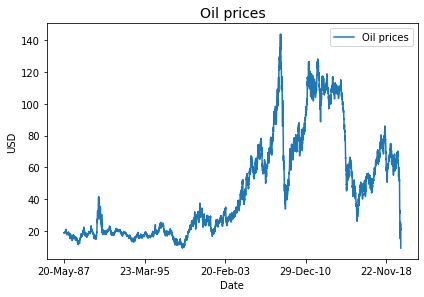

In [5]:
#let s build plot with oil prices
OIL_rates['Price'].plot(ax=plt.gca(), label='Oil prices')
plt.legend(loc=0)
plt.ylabel('USD')
plt.tight_layout()
plt.title('Oil prices', fontsize=14)

Stage 2.Data preparation. 


Our dataset is flat let s build matrix.

In [6]:
past = 7  #we will look in the past for 7 days
future = 7  #we will look into the future for 7 days

money = OIL_rates.Price  #we make new dataframe
money.head()

Date
20-May-87    18.63
21-May-87    18.45
22-May-87    18.55
25-May-87    18.60
26-May-87    18.63
Name: Price, dtype: float64

In [7]:
#make columns for matrix
start = past; end = len(money)-future; print(f'Start day {start}, to {end}', start, end)
table = []   #list for data in table format
for i in range(start, end):
    buff = money[(i-past):(i+future)]
    table.append(list(buff))

past_columns = []
for i in range(past):
    past_columns.append("past_"+str(i))
print(past_columns)


Start day 7, to 8353 7 8353
['past_0', 'past_1', 'past_2', 'past_3', 'past_4', 'past_5', 'past_6']


In [8]:
future_columns = []  # list for future columns
for i in range(future):
    future_columns.append("future_"+str(i))
print(future_columns)

data_df = pandas.DataFrame(table, columns=(past_columns+future_columns))
data_df.head()

['future_0', 'future_1', 'future_2', 'future_3', 'future_4', 'future_5', 'future_6']


,past_0,past_1,past_2,past_3,past_4,past_5,past_6,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,18.63,18.45,18.55,18.60,18.63,18.60,18.60,18.58,18.65,18.68,18.75,18.78,18.65,18.75
1,18.45,18.55,18.60,18.63,18.60,18.60,18.58,18.65,18.68,18.75,18.78,18.65,18.75,18.78
2,18.55,18.60,18.63,18.60,18.60,18.58,18.65,18.68,18.75,18.78,18.65,18.75,18.78,18.78
3,18.60,18.63,18.60,18.60,18.58,18.65,18.68,18.75,18.78,18.65,18.75,18.78,18.78,18.68
4,18.63,18.60,18.60,18.58,18.65,18.68,18.75,18.78,18.65,18.75,18.78,18.78,18.68,18.78


Stage 3. 


Let s divide our dataframe into X and Y part in order to train our model.

In [9]:
#  let s make X dataframe for training model
X = data_df[past_columns]
X.head()

,past_0,past_1,past_2,past_3,past_4,past_5,past_6
0,18.63,18.45,18.55,18.60,18.63,18.60,18.60
1,18.45,18.55,18.60,18.63,18.60,18.60,18.58
2,18.55,18.60,18.63,18.60,18.60,18.58,18.65
3,18.60,18.63,18.60,18.60,18.58,18.65,18.68
4,18.63,18.60,18.60,18.58,18.65,18.68,18.75


In [10]:
#  let s make Y dataframe for training model
Y = data_df[future_columns]
Y.head()

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,18.58,18.65,18.68,18.75,18.78,18.65,18.75
1,18.65,18.68,18.75,18.78,18.65,18.75,18.78
2,18.68,18.75,18.78,18.65,18.75,18.78,18.78
3,18.75,18.78,18.65,18.75,18.78,18.78,18.68
4,18.78,18.65,18.75,18.78,18.78,18.68,18.78


In [11]:
#let s divide our dataset in train and validation
X_train, X_validation, Y_train, Y_validation=train_test_split(X,Y,test_size = 0.9, random_state = RS)

Now we have two parts of information X and Y. X contains history information from the past and Y contains future history information. Let s train our model.

Stage 4.Model train


We take MLPRegressor from sklear lib which is nuaral net.

In [12]:
my_model = MLPRegressor(random_state=RS)
my_model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=42, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [15]:
my_model.score(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9938273579982094

In [16]:
#let s make prediction
prediction = my_model.predict(X[-1:])
print(X[-1:])
print(prediction)


      past_0  past_1  past_2  past_3  past_4  past_5  past_6
8345   19.07   19.19   14.97   20.24   24.33   22.58    22.1
[[22.3844286  21.14475594 20.5084142  21.61975381 20.63945429 21.1922622
  22.0806297 ]]


In [17]:
#let s find our error which make our model. This is important in order to evaluate our model
err = mean_absolute_error(prediction, Y.iloc[-1:])
print(err)

2.130573306241703


In [18]:
#let s see error on train and validation
print('Error on train is ',mean_absolute_error(my_model.predict(X_train),Y_train))
print('Error on validation is ',mean_absolute_error(my_model.predict(X_validation),Y_validation))

Error on train is  1.6664722344423186
Error on validation is  1.639585094672744


So we are mistaked about 1.5 USD in our prediction. Let s try to improve our model and make GRIDSEARCH

Stage 5. GRID SEARCH

In [23]:
mlpr = MLPRegressor(max_iter=7000,random_state=RS)

param_list = {"hidden_layer_sizes": [(100,),(90,),(100,100,)], "activation": ["tanh", "relu"], \
              "solver": ["sgd", "adam"], "alpha": [0.00004,0.00005,0.0001]}
gridCV = GridSearchCV(estimator=mlpr, param_grid=param_list,cv=3)
gridCV.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=7000, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=42, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'activation':

In [24]:
best_model=gridCV.best_estimator_

In [25]:
best_model.score(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9944844716794722

In [26]:
#let s see error on train and validation
print('Error on train is ',mean_absolute_error(best_model.predict(X_train),Y_train))
print('Error on validation is ',mean_absolute_error(best_model.predict(X_validation),Y_validation))

Error on train is  1.5593478768432543
Error on validation is  1.5437629346835455


We found model which make predictions with more small errors then our first model my_model

**Stage** 6.


Let s save our model in order to have constant file which can be used in future projects.

In [ ]:
#let s save our model in order to use it future

filename = 'finalized_model.pickle'
pickle.dump(best_model, open(filename, 'wb'))


In [ ]:
# This is example of code how to load saved model
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# prediction = loaded_model.predict(X_test)
# print(prediction)

In [ ]:
#we word in Colab service so let s download saved model to our local computer
from google.colab import files
files.download('finalized_model.pickle')